In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [88]:
pd.set_option('display.max_rows', 1000)


In [89]:
pd.options.display.max_columns = 1000

In [90]:
mtf =pd.read_csv('Mobile_Telecommunications_Franchise_Pole_Reservation_Locations.csv', delimiter = ',', header = 0)
imp =pd.read_csv('Internet_Master_Plan__Adoption_and_Infrastructure_Data_by_Neighborhood.csv', delimiter = ',', header = 0)

#### LET THE DATA CLEANING BEGIN! 

DATASET 1 - 
Mobile Telecommunications Franchise Pole Reservation Locations CLEANING

These rows will remove all columns and rows deemed uneccessary 
We are removing Park, School, Historic, Scenic and Bid Advisory pole locations as these require extended approval 
that is too time consuming for our end use. 
removed all nulls

Locations of street light poles, traffic light poles and utility poles reserved by companies authorized by the New York City Department of Information Technology and Telecommunications for the potential installation of mobile telecommunications equipment.


In [91]:
mtf2=mtf

In [92]:
mtf2 = mtf2[pd.isnull(mtf2['Park Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['School Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['Historic Landmark Advisory'])]
mtf2 = mtf2[pd.isnull(mtf2['Scenic Landmark Advisory'])]
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282 entries, 48 to 10968
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          9282 non-null   int64  
 1   Reservation Date            9282 non-null   object 
 2   Franchisee Name             9282 non-null   object 
 3   Status                      9282 non-null   object 
 4   Pole Class                  9282 non-null   object 
 5   Borough                     9282 non-null   object 
 6   X Coord.                    9282 non-null   float64
 7   Y Coord.                    9282 non-null   int64  
 8   Latitude                    9282 non-null   float64
 9   Longitude                   9282 non-null   float64
 10  Zone                        9282 non-null   object 
 11  On street                   9282 non-null   object 
 12  Cross street 1              9282 non-null   object 
 13  Cross street 2              927

In [93]:
mtf2.dropna(axis=1, how='all', inplace=True)

In [94]:
mtf2.drop('BID Advisory', axis=1, inplace= True)

In [95]:
mtf2.dropna(inplace= True)

In [96]:
mtf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9272 entries, 48 to 10968
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                9272 non-null   int64  
 1   Reservation Date  9272 non-null   object 
 2   Franchisee Name   9272 non-null   object 
 3   Status            9272 non-null   object 
 4   Pole Class        9272 non-null   object 
 5   Borough           9272 non-null   object 
 6   X Coord.          9272 non-null   float64
 7   Y Coord.          9272 non-null   int64  
 8   Latitude          9272 non-null   float64
 9   Longitude         9272 non-null   float64
 10  Zone              9272 non-null   object 
 11  On street         9272 non-null   object 
 12  Cross street 1    9272 non-null   object 
 13  Cross street 2    9272 non-null   object 
 14  Zipcode           9272 non-null   int64  
 15  Community Board   9272 non-null   int64  
 16  Council District  9272 non-null   int64 

In [97]:
mtf2.reset_index(drop=True)

,Id,Reservation Date,Franchisee Name,Status,Pole Class,Borough,X Coord.,Y Coord.,Latitude,Longitude,Zone,On street,Cross street 1,Cross street 2,Zipcode,Community Board,Council District
0,10270,09/26/2014,Crown Castle NG,Installed,CITY,Manhattan,992253.0,224437,40.782700,-73.971102,A,Central Park West,W 82nd st,W 83rd st,83,164,6
1,10179,09/26/2014,Crown Castle NG,Installed,CITY,Manhattan,989795.0,220004,40.770535,-73.979981,A,Central Park West,63rd Street,64th Street,83,164,6
2,6761,04/14/2009,Crown Castle NG,Installed,CITY,Manhattan,996598.0,226568,40.788544,-73.955408,B,5th Ave,E 97th St,E 96th St,83,164,6
3,17499,12/22/2017,Crown Castle NG,Proposed,CITY,Manhattan,989773.0,219965,40.770428,-73.980060,A,Central Park West,W 63rd St,W 62nd St,83,164,6
4,21620,07/10/2019,ExteNet I,Proposed,CITY,Manhattan,986889.0,213037,40.751413,-73.990475,A,7 AVE,W 34 ST,W 35 ST,10001,105,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,19711,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1005706.0,143379,40.560192,-73.922782,B,Bath Walk,Rockaway Point Blvd,Seabreeze Walk,11697,414,32
9268,19707,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1007537.0,142787,40.558563,-73.916194,B,207st,8th Ave,7th Ave,11697,414,32
9269,19706,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1006067.0,142004,40.556417,-73.921487,B,Marion Walk,Breezy Point Blvd,Oceanside Ave,11697,414,32
9270,19705,08/02/2018,Crown Castle NG,Proposed,UTILITY,Queens,1003848.0,141775,40.555794,-73.929473,B,Beach 221nd St,4th Ave,Breezy Point Blvd,11697,414,32


DATASET 2 - (IMP) Internet Master Plan: Adoption and Infrastructure Data by Neighborhood
Key indicators of broadband adoption, service and infrastructure in New York City.

In [98]:
#imp rows edtited to remove commas and change data types to numeric values
imp['Total Population'] = imp['Total Population'].str.replace(',', '').astype(int)
imp['Population Density (per Sq. Mi.)'] = imp['Population Density (per Sq. Mi.)'].str.replace(',', '').astype(float)
imp['Total Number of Households'] = imp['Total Number of Households'].str.replace(',', '').astype(int)
imp['Number of Households'] = imp['Number of Households'].str.replace(',', '').astype(float)
imp['Total Accounts'] = imp['Total Accounts'].str.replace(',', '').astype(float) 
imp['Estimated Number of Businesses'] = imp['Estimated Number of Businesses'].str.replace(',', '').astype(float)
imp['Account Density'] = imp['Account Density'].str.replace(',', '').astype(float)
imp['Population Projections 2050'] = imp['Population Projections 2050'].str.replace(',', '').astype(float)
imp['Households Receiving Benefits'] = imp['Households Receiving Benefits'].str.replace(',', '').astype(float)


In [99]:
imp['Estimated Lifeline Eligible Households'] = imp['Estimated Lifeline Eligible Households'].str.replace(',', '').astype(float)
imp['Supportive Housing (NYCDHS)'] = imp['Supportive Housing (NYCDHS)'].str.replace(',', '').astype(float)
imp['Low-Income Housing (NYCHA)'] = imp['Low-Income Housing (NYCHA)'].str.replace(',', '').astype(float)

In [100]:

imp = imp.astype({"Poles Reserved by Mobile Telecom Franchisee": float, "Pole with Equipment Installed by Mobile Telecom Franchise": float, "Density of Poles Reserved and with Equipment Installed for Mobile Telecom Franchise":float})

In [101]:
imp = imp.rename(columns = {'Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves': 'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves'})

In [102]:
imp.columns = [item.replace(" ","_") for item in imp.columns]
imp.columns = [item.replace("(","_") for item in imp.columns]
imp.columns = [item.replace(")","_") for item in imp.columns]
imp.columns = [item.replace(".","_") for item in imp.columns]

In [155]:
imp = imp.rename(columns = {'Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves': 'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves'})

In [103]:
# imp.drop(imp.index[87], inplace = True)

In [104]:
imp.drop('Empire_City_Subway_Coverage__Quartile_', axis=1, inplace= True)

In [105]:
bool_series = pd.isnull(imp["Estimated_Number_of_Businesses"])
imp[bool_series]
#This returned null values as neighborhoods designated as cemetaries, Queens Airport and Rikers Island

,Neighborhood_Tabulation_Area_Code__NTA_Code_,Neighborhood_Tabulation_Area_Name__NTA_NAME_,Borough_Name,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,"Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Broadband_Adoption__Percentage_of_Households_,"Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Dependent_Households__Percentage_of_Households_,"Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Residential_Broadband_Choice_Average_by_NTA,"Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_ISP_Choice_Average_by_NTA,"Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_Max_ISP_Choice_by_NTA,"Commercial_Fiber_Max_ISP_Choice_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider_by_Quartiles,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Available_Free_Public_Wi-Fi_in_a_Pedestrian_Corridor__Y/N_,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Account_Density_Quartile,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Presence_of_IBZs,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,City_Buildings_with_High_Rooftops__7+_Floors__Capacity_by_Quartile,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Mobile_Telecom_Franchise_Pole_Density_Level_by_Quartile,Empire_City_Subway_Coverage__Percentage_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Geographic_Variations_in_Fiber_Delivery_Modes_by_NTA,Estimated_Underground_Utility_Conflict_Volume,Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves,Utility_Pole_Make-Ready_-_Estimated_Relative_Volume,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient_by_Quartile,"Fiber_Drops,_Estimated_Relative_Costs","Indoor_Cabling_for_Multiple_Dwelling_Units,_Estimated__Relative_Costs",Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Sample_of_NTA_Field_Surveyed?__Y/N_,Reviewed_for_Underground_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Aerial_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Millimeter_Wave_Fixed_Wireless_Access?__Y/N_,Field_Survey_Findings
50,BK99,park-cemetery-etc-Brooklyn,Brooklyn,93,NaN,167,8.21,71,0.95,High,0.95,High,0.02,Low,1.7,Low,1.4,Medium-High,3,Medium High,0.72,UF,0.73,0.65,1,27,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2.0,4.0,0.08,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [106]:
imp.dropna(subset=['Estimated_Number_of_Businesses'], inplace=True)

#### Creation of New Columns/Parameters for Enhanced Analysis

In [78]:
imp.columns

Index(['Neighborhood_Tabulation_Area_Code__NTA_Code_',
       'Neighborhood_Tabulation_Area_Name__NTA_NAME_', 'Borough_Name',
       'Total_Population', 'Population_Density__per_Sq__Mi__',
       'Total_Number_of_Households', 'Area__Sq__Mi__', 'Street_Mileage',
       'Home_Broadband_Adoption__Percentage_of_Households_',
       'Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Mobile_Broadband_Adoption__Percentage_of_Households_',
       'Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Mobile_Dependent_Households__Percentage_of_Households_',
       'Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Residential_Broadband_Choice_Average_by_NTA',
       'Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_',
       'Commercial_Fiber_ISP_Choice_Average_by_NTA',
       'Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Me

In [109]:
imp['Percentage_of_Blocks_WITH_Commercial_Fiber_Provider'] = 1 - imp['Percentage_of_Blocks_without_a_Commercial_Fiber_Provider']

In [110]:
imp['Size_of_Population_Growth_by_2030'] = imp['Population_Projections_2050']-imp['Total_Population']

In [111]:
imp['2030_Population_Density'] = imp['Population_Projections_2050']/imp['Area__Sq__Mi__']

In [112]:
imp.Poles_Reserved_by_Mobile_Telecom_Franchisee.mean()

8.787234042553191

In [113]:
def Pole_Rich(Poles_Reserved_by_Mobile_Telecom_Franchisee):
    if Poles_Reserved_by_Mobile_Telecom_Franchisee >= 8.787234042553191:
        return "Poles Reserved Above Average"
    elif Poles_Reserved_by_Mobile_Telecom_Franchisee  < 8.787234042553191:
        return "Poles Reserved Below Average"
    else:
        return "unknown"

In [114]:
imp['Pole_Rich'] = np.vectorize(Pole_Rich)(imp['Poles_Reserved_by_Mobile_Telecom_Franchisee'])

In [121]:
def high_growth (row):
   if (row['Size_of_Population_Growth_by_2030']>= 3622) & (row['Population_Density__per_Sq__Mi__'] >= 44394.961598) :
      return 'High Growth'
   elif (row['Size_of_Population_Growth_by_2030']< 3622) & (row['Population_Density__per_Sq__Mi__'] < 44394.961598) :
      return 'Low Growth'     
   else :
      return 'Unknown'

In [123]:
imp.head()

,Neighborhood_Tabulation_Area_Code__NTA_Code_,Neighborhood_Tabulation_Area_Name__NTA_NAME_,Borough_Name,Total_Population,Population_Density__per_Sq__Mi__,Total_Number_of_Households,Area__Sq__Mi__,Street_Mileage,Home_Broadband_Adoption__Percentage_of_Households_,"Home_Broadband_Adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Broadband_Adoption__Percentage_of_Households_,"Mobile_broadband_adoption_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Mobile_Dependent_Households__Percentage_of_Households_,"Mobile_Dependent_Households_Categorized_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Residential_Broadband_Choice_Average_by_NTA,"Residential_Broadband_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_ISP_Choice_Average_by_NTA,"Commercial_Fiber_Choice_Average_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Commercial_Fiber_Max_ISP_Choice_by_NTA,"Commercial_Fiber_Max_ISP_Choice_by_Quartiles__High,_Medium-High,_Medium-Low,_Low_",Percentage_of_Blocks_without_a_Commercial_Fiber_Provider,Percentage_of_Blocks_without_a_Commercial_Fiber_Provider_by_Quartiles,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=25_Mbps__Broadband_Speed_,Percentage_of_Blocks_with_ISP_Reported_Speed_Availability_of_>=900_Mbps,Number_of_Public_Computer_Centers_with_free_public_Wi-Fi,Public_Wi-Fi_in_NYC_Count,Number_of_Free_Public_Wi-Fi_Access_Points_in_a_Pedestrian_Corridor,Available_Free_Public_Wi-Fi_in_a_Pedestrian_Corridor__Y/N_,Estimated_Number_of_Businesses,Number_of_Households,Total_Accounts,Account_Density,Account_Density_Quartile,Population_Projections_2050,Households_Receiving_Benefits,Estimated_Lifeline_Eligible_Households,Supportive_Housing__NYCDHS_,Low-Income_Housing__NYCHA_,Presence_of_IBZs,Number_of_NYCHA_Buildings,Number_of_Public_Schools,Number_of_DCAS_Buildings,Number_of_NYC_H+H_Buildings,City_Buildings_with_High_Rooftops__7+_Floors__Capacity_by_Quartile,Street_Furniture:_FDNY_Call_Boxes,Street_Furniture:_Parking_Pay_Stations,Street_Furniture:_Bus_Stop_Shelters,Street_Furniture:_Bike_Shelters,Street_Furniture:_City_Benches,LinkNYC_Kiosks,WalkNYC_Sign_Locations,Poles_Reserved_by_Mobile_Telecom_Franchisee,Pole_with_Equipment_Installed_by_Mobile_Telecom_Franchise,Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise,Mobile_Telecom_Franchise_Pole_Density_Level_by_Quartile,Empire_City_Subway_Coverage__Percentage_,Percentage_of_Households_with_fewer_than_3_broadband_options_available,Number_of_Fixed_Wireless_Providers_Available,Estimated_Aerial_Plant_Coverage__Percentage_,Estimated_Underground_Plant_Coverage__Percentage_,Geographic_Variations_in_Fiber_Delivery_Modes_by_NTA,Estimated_Underground_Utility_Conflict_Volume,Utility_Pole_Make-Ready_-_Estimated_Required_Number_of_Moves,Utility_Pole_Make-Ready_-_Estimated_Relative_Volume,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient,NYC_Internet_Master_Plan_Open_Access_Infrastructure_Cost_Comparison_Coefficient_by_Quartile,"Fiber_Drops,_Estimated_Relative_Costs","Indoor_Cabling_for_Multiple_Dwelling_Units,_Estimated__Relative_Costs",Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Percentage_Optimal_for_Unlicensed\nMillimeter_Wave_Fixed_Wireless_Access_as_a_Residential\nBroadband_Solution,Estimated_number_of_radio_sites_for_CBRS_coverage,Estimated_number_of_radio_sites_for_mmWave_coverage_in_optimal_areas,Sample_of_NTA_Field_Surveyed?__Y/N_,Reviewed_for_Underground_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Aerial_Fiber-to-the-Premise?__Y/N_,Reviewed_for_Millimeter_Wave_Fixed_Wireless_Access?__Y/N_,Field_Survey_Findings,Percentage_of_Blocks_WITH_Commercial_Fiber_Provider,Size_of_Population_Growth_by_2030,2030_Population_Density,Pole_Rich,Pop_Growth_Rate
0,BK09,Brooklyn Heights-Cobble Hill,Brooklyn,24140,67407.17,11115,0.36,19,0.85,High,0.82,High,0.04,Medium Low,2.6,High,2.0,High,6,High,0.27,High,1.00,1.00,2,27,17,True,3097.0,

In [122]:
imp['Pop_Growth_Rate']= imp.apply (lambda row: high_growth(row), axis=1)

In [127]:
imp.Pop_Growth_Rate.value_counts(normalize=True)

Low Growth     0.436170
Unknown        0.324468
High Growth    0.239362
Name: Pop_Growth_Rate, dtype: float64

In [118]:
high_growth = imp[(imp['Size_of_Population_Growth_by_2030'] > 3622) & (imp['Population_Density__per_Sq__Mi__'] > 44394.961598)]
high_growth['Population_Density__per_Sq__Mi__']

2       55432.80
8       54747.36
9       50080.12
14      73847.55
27      61122.10
28      57864.19
30      55846.77
31      51230.88
32      52498.59
33      81227.34
34      52467.36
35      64354.26
37      68038.22
38      52056.56
40      51231.34
42      49377.63
44      54677.41
49      47693.66
53     104083.79
60      98747.09
61      64447.07
63      66311.76
65      55569.63
67      66282.21
70      69804.19
71      65919.70
72      72895.38
75     125654.72
76     100354.44
85      53777.07
96      58128.36
97     105290.94
98      67181.49
100     79549.63
101     91947.44
105     47867.59
107     86316.90
111    100090.93
112     69465.25
133     52055.19
138     60660.14
139     71384.84
167     45106.27
170     54755.49
171     50172.21
Name: Population_Density__per_Sq__Mi__, dtype: float64

In [84]:
imp.reset_index(drop=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

#### EDA -Exploratory Data Analysis -WHAT IS UNDER THE HOOD?

In [116]:
imp['Size_of_Population_Growth_by_2030'].mean()

3622.2659574468084

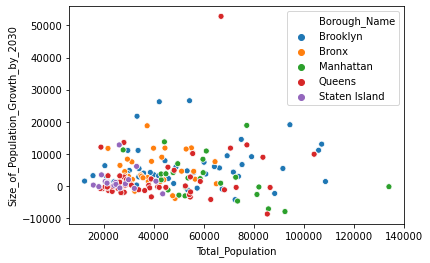

In [117]:
sns.scatterplot(x = "Total_Population", y = 'Size_of_Population_Growth_by_2030', data=imp, hue='Borough_Name')
plt.show()

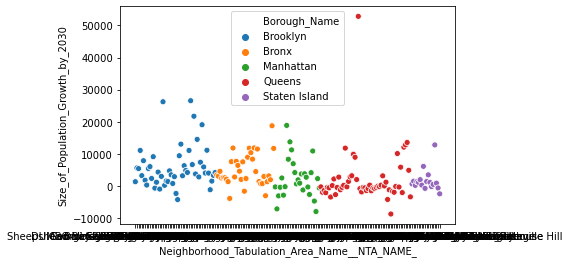

In [128]:
sns.scatterplot(x = "Neighborhood_Tabulation_Area_Name__NTA_NAME_", y = 'Size_of_Population_Growth_by_2030', data=imp, hue='Borough_Name')
plt.show()

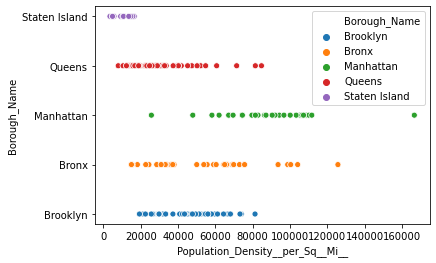

In [129]:
sns.scatterplot(x = 'Population_Density__per_Sq__Mi__', y = "Borough_Name", data=imp, hue='Borough_Name')
plt.show()

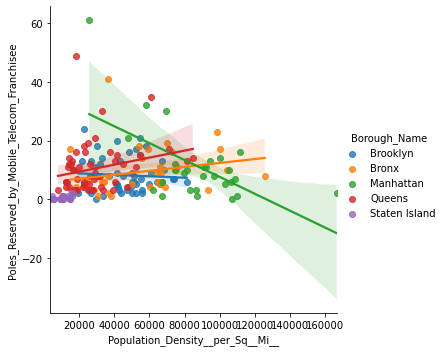

In [130]:
sns.lmplot(x = 'Population_Density__per_Sq__Mi__', y = 'Poles_Reserved_by_Mobile_Telecom_Franchisee', data=imp, hue='Borough_Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

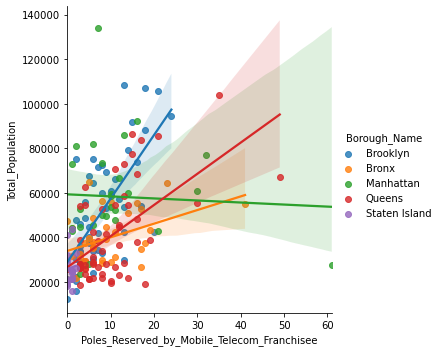

In [132]:
sns.lmplot(x = 'Poles_Reserved_by_Mobile_Telecom_Franchisee', y = 'Total_Population', data=imp, hue='Borough_Name')
plt.show()

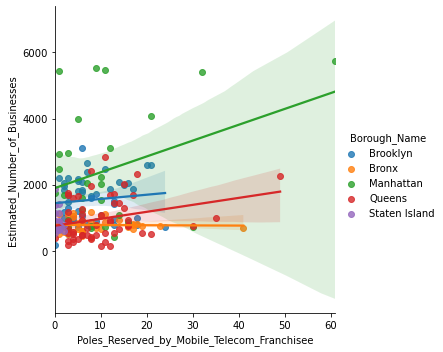

In [131]:
sns.lmplot(x = 'Poles_Reserved_by_Mobile_Telecom_Franchisee', y = 'Estimated_Number_of_Businesses', data=imp, hue='Borough_Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

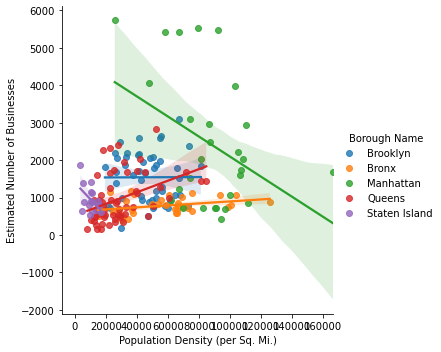

In [37]:
sns.lmplot(x = 'Population Density (per Sq. Mi.)', y = 'Estimated Number of Businesses', data=imp, hue='Borough Name')
plt.show()
#do businesses account for the high amount of poles in a low population density area?

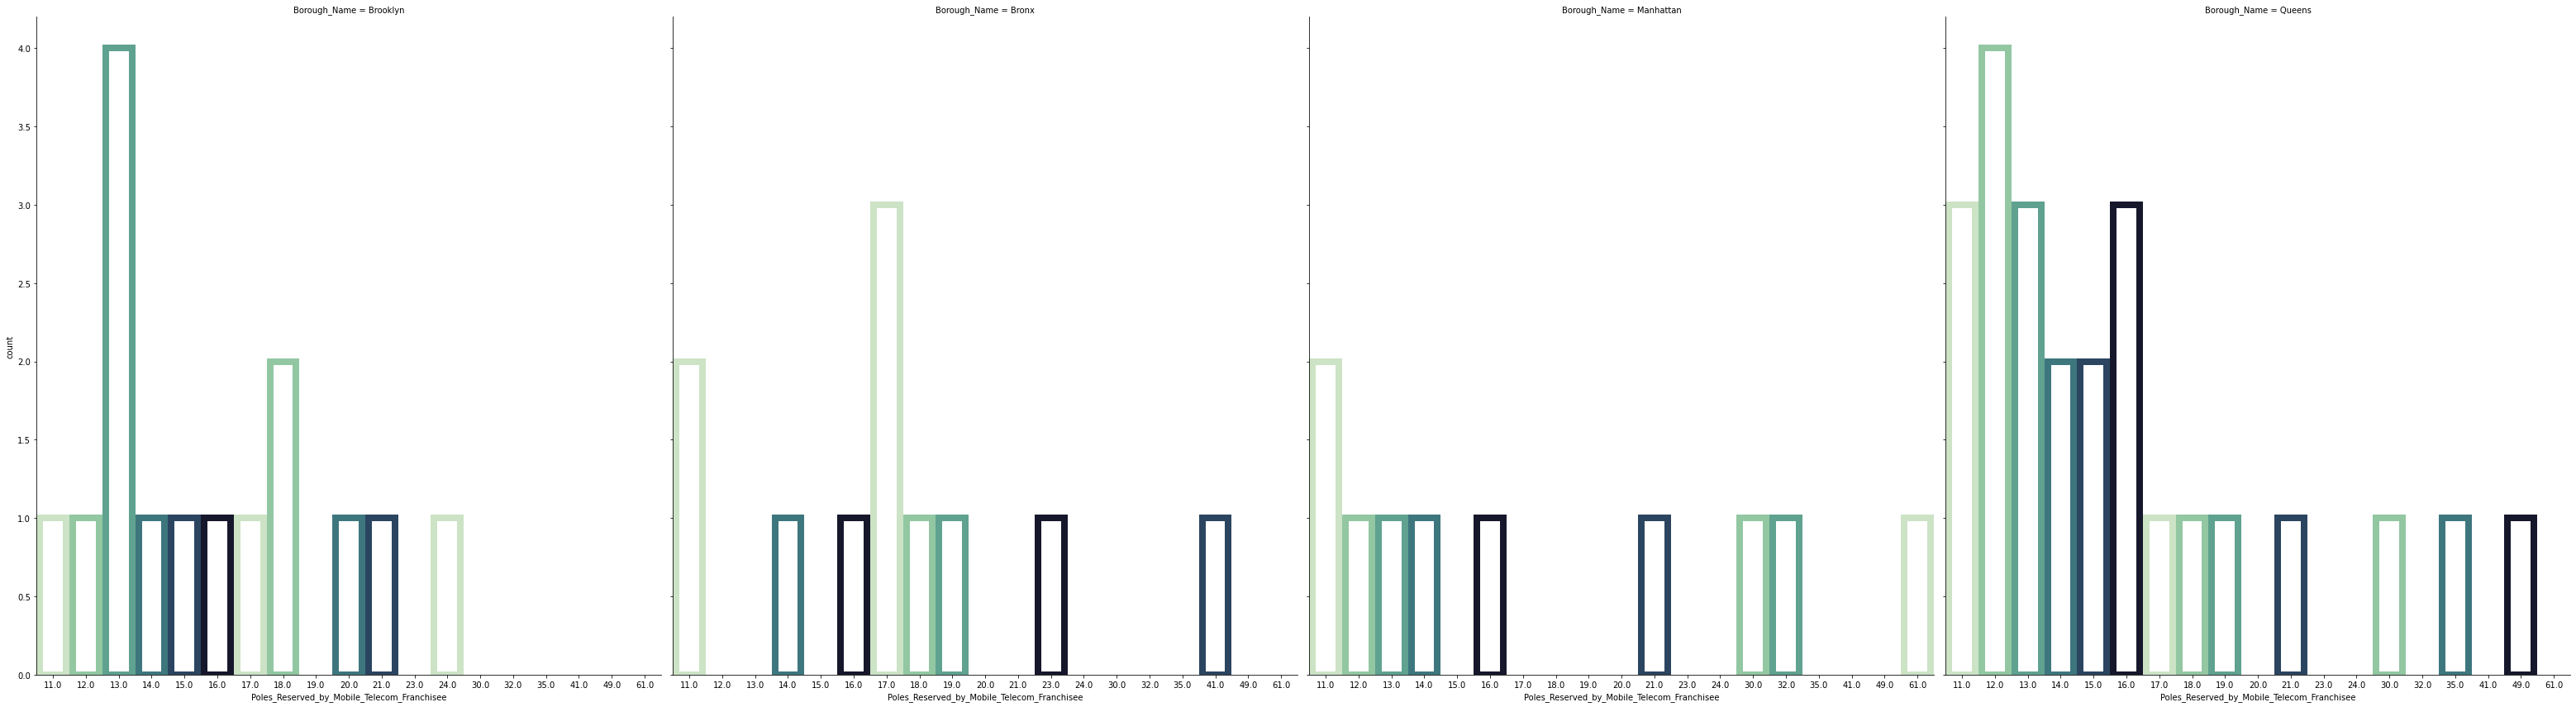

In [133]:
g = sns.catplot('Poles_Reserved_by_Mobile_Telecom_Franchisee', col='Borough_Name', col_wrap=4, data=imp[#(FINAL['renta']> 175000) & 
    (imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']>10)],kind="count", height=12, aspect=.9, 
                facecolor=(0, 0, 0, 0),
                   linewidth=8,
                   edgecolor=sns.color_palette("ch:55530555.1,-.5,dark=.1"))

#### SAVE DATA FRAMES TO CSV FOR TABLEAU USE

In [135]:
mtf2.to_csv('mtf2.csv', index = False, header=True)
imp.to_csv('imp.csv', index = False, header=True)

#### LINEAR REGRESSION MODEL

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = imp.iloc[:,0], imp.drop(columns=imp.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, imp.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [156]:
X = imp[['Total_Population',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider', 
         'Population_Density__per_Sq__Mi__', 
         'Size_of_Population_Growth_by_2030',
         'Density_of_Poles_Reserved_and_with_Equipment_Installed_for_Mobile_Telecom_Franchise',
         'Percentage_of_Blocks_WITH_Commercial_Fiber_Provider',
         'Estimated_Number_of_Businesses', 
         'Fiber_Drops,_Estimated_Relative_Costs',
         'Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves',
         'Percentage_of_Blocks_without_a_Commercial_Fiber_Provider',  
         'Commercial_Fiber_Max_ISP_Choice_by_NTA']]

In [157]:
y = imp['Poles_Reserved_by_Mobile_Telecom_Franchisee']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [159]:
imp_train = pd.concat([X_train, y_train], axis = 1)

In [160]:
imp_test = pd.concat([X_test,y_test], axis = 1)


In [161]:
linear_model = smf.ols(formula='Poles_Reserved_by_Mobile_Telecom_Franchisee ~  Estimated_Number_of_Businesses + Total_Population + Size_of_Population_Growth_by_2030 + Percentage_of_Blocks_WITH_Commercial_Fiber_Provider + Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves', data=imp_train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Poles_Reserved_by_Mobile_Telecom_Franchisee   R-squared:                       0.350
Model:                                                     OLS   Adj. R-squared:                  0.326
Method:                                          Least Squares   F-statistic:                     14.56
Date:                                         Tue, 22 Sep 2020   Prob (F-statistic):           2.10e-11
Time:                                                 17:49:59   Log-Likelihood:                -476.00
No. Observations:                                          141   AIC:                             964.0
Df Residuals:                                              135   BIC:                             981.7
Df Model:                                                    5                                         
Covariance Type:                                     nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      4.4302      6.209      0.714      0.477      -7.849      16.709
Estimated_Number_of_Businesses                                 0.0011      0.001      1.600      0.112      -0.000       0.003
Total_Population                                               0.0001   2.93e-05      4.308      0.000    6.83e-05       0.000
Size_of_Population_Growth_by_2030                              0.0006   9.63e-05      5.897      0.000       0.000       0.001
Percentage_of_Blocks_WITH_Commercial_Fiber_Provider            3.0403      4.890      0.622      0.535      -6.631      12.712
Utility_Pole_Make_Ready_Estimated_Required_Number_of_Moves    -1.8524      1.177     -1.573      0.118      -4.181       0.476
==============================================================================
Omnibus:                       97.580   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.512
Skew:                           2.298   Prob(JB):                    2.64e-204
Kurtosis:                      14.767   Cond. No.                     6.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
predictions = linear_model.predict(imp_test)

In [163]:
predictions = predictions.dropna()

In [164]:
imp_test = imp_test.dropna()

In [165]:
r2_score(imp_test['Poles_Reserved_by_Mobile_Telecom_Franchisee'], predictions)

0.36531800270422266